In [63]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/circle regression.csv")
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [65]:
print(df)

    -9.7   9.4
0   -9.0  6.70
1   -8.0  4.20
2   -7.0  3.10
3   -6.0  2.10
4   -5.0  1.39
5   -4.0  0.90
6   -3.0  0.50
7   -2.0  0.20
8   -1.0  0.02
9    0.0  0.00
10   1.0  0.02
11   2.0  0.19
12   3.0  0.48
13   4.0  0.85
14   5.0  1.38
15   6.0  2.10
16   7.0  3.04
17   8.0  4.30
18   9.0  6.80
19   9.7  9.82


In [66]:
x=df.iloc[:,0]
print(type(x))
y=df.iloc[:,1]


<class 'pandas.core.series.Series'>


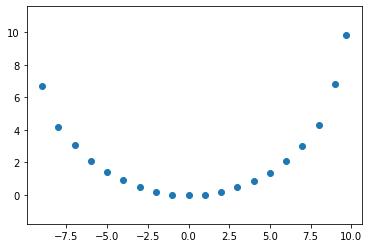

In [67]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(x, y)
plt.axis('equal')
plt.show()

In [68]:
from scipy import optimize
from math import pi

def r(x, y, xc, yc):
  return np.sqrt((x-xc)**2 + (y-yc)**2)


def f(c, x, y):
  Ri = r(x, y, *c)
  return np.square(Ri - Ri.mean())


In [69]:
def least_squares_circle(coords):
    x, y = None, None
    if isinstance(coords, np.ndarray):
        x = coords[:, 0]
        y = coords[:, 1]
    elif isinstance(coords, list):
        x = np.array([point[0] for point in coords])
        y = np.array([point[1] for point in coords])
    else:
        raise Exception("Parameter 'coords' is an unsupported type: " + str(type(coords)))

    # coordinates of the barycenter
    x_m = np.mean(x)
    y_m = np.mean(y)
    center_estimate = x_m, y_m
    center, _ = optimize.leastsq(f, center_estimate, args=(x, y))
    xc, yc = center
    Ri       = r(x, y, *center)
    R        = Ri.mean()
    residu   = np.sum((Ri - R)**2)
    return xc, yc, R, residu


In [70]:
def plot_data_circle(x, y, xc, yc, R):
    f = plt.figure(facecolor='white')
    plt.axis('equal')

    theta_fit = np.linspace(-pi, pi, 180)

    x_fit = xc + R*np.cos(theta_fit)
    y_fit = yc + R*np.sin(theta_fit)
    plt.plot(x_fit, y_fit, 'b-' , label="fitted circle", lw=2)
    plt.plot([xc], [yc], 'bD', mec='y', mew=1)
    plt.xlabel('x')
    plt.ylabel('y')
    # plot data
    plt.scatter(x, y, c='red', label='data')

    plt.legend(loc='best', labelspacing=0.1 )
    plt.grid()
    plt.title('Fit Circle')


least_squares: 
xc: 0.010675201786055799
yc: 9.545974554747163
r: 9.553773580063034
residual: 0.06445922382930636



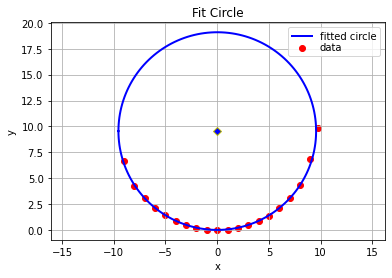

In [72]:
coords = np.array([[x[i], y[i]] for i in range(len(x))])
xc, yc, r, residual = least_squares_circle(coords)
print("least_squares: \n"
      "xc: {xc}\n"
      "yc: {yc}\n"
      "r: {r}\n"
      "residual: {residual}\n".format(xc=xc, yc=yc, r=r, residual=residual))
plot_data_circle(coords[:, 0], coords[:, 1], xc, yc, r)
plt.show()
